Librerías importadas correctamente.
Cargando datos desde Radiografias.csv...
Datos cargados: 58954 filas, 785 columnas

Primeras 5 filas del dataset:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     101     101     101     101     101     101     101     101     101   
1     101     101     101     101     101     101     101     101     101   
2     101     101     101     101     101     101     101     101     101   
3     101     101     101     101     101     101     101     101     101   
4     101     101     101     101     101     101     101     101     101   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     101  ...       102       103       101       102       100       100   
1     101  ...       102       101       101       100       102       100   
2     101  ...       102       103       101       101       100       100   
3     101  ...       102       102       100       101       101       101 

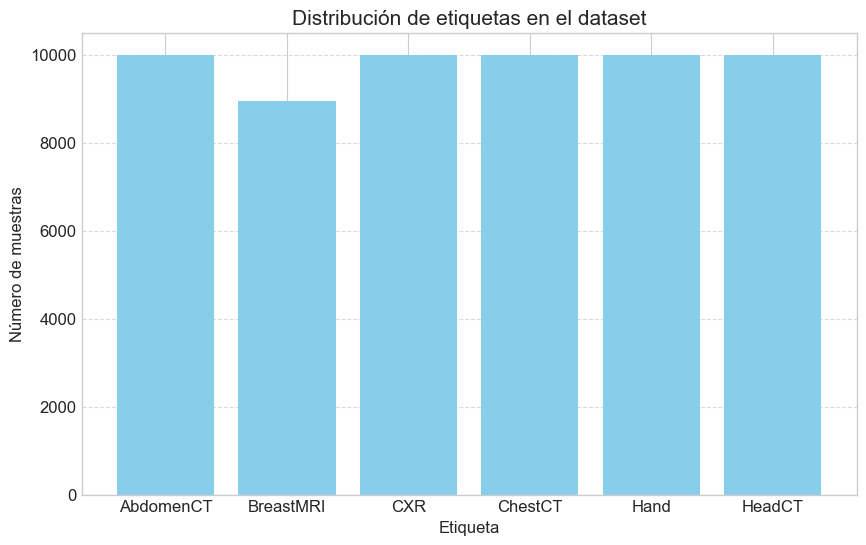

Realizando PCA para reducir dimensionalidad a 3 componentes...
Varianza explicada: 65.38%
Contribución por componente:
  PC1: 48.48%
  PC2: 11.62%
  PC3: 5.27%


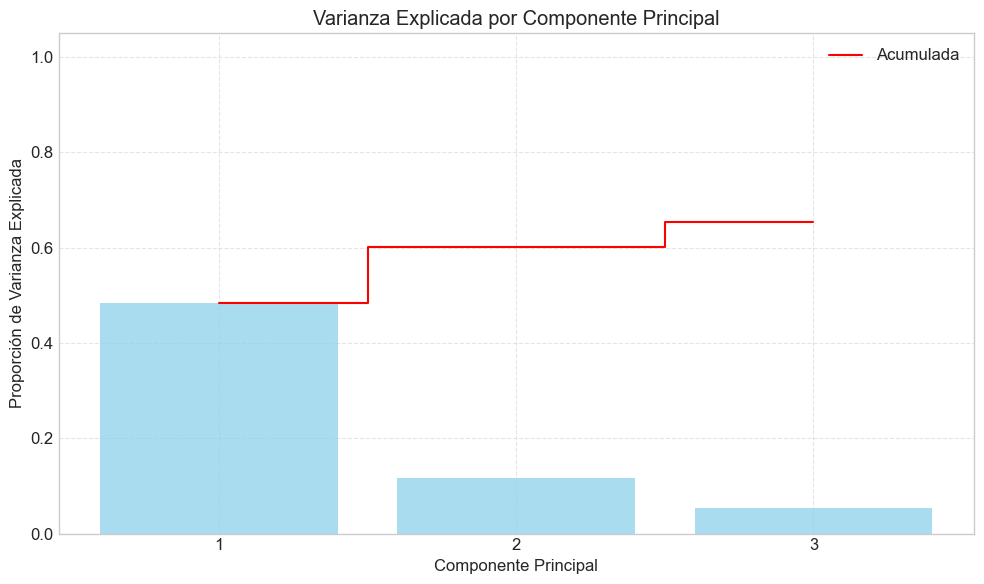

Visualización de datos originales en espacio PCA 2D:


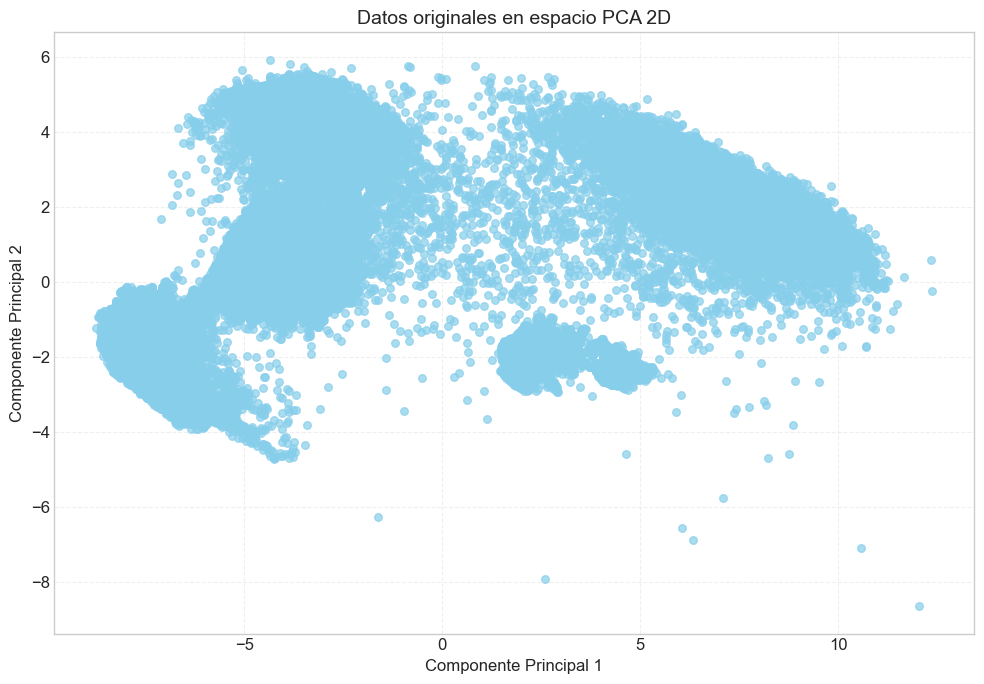


Visualización de datos originales en espacio PCA 3D:


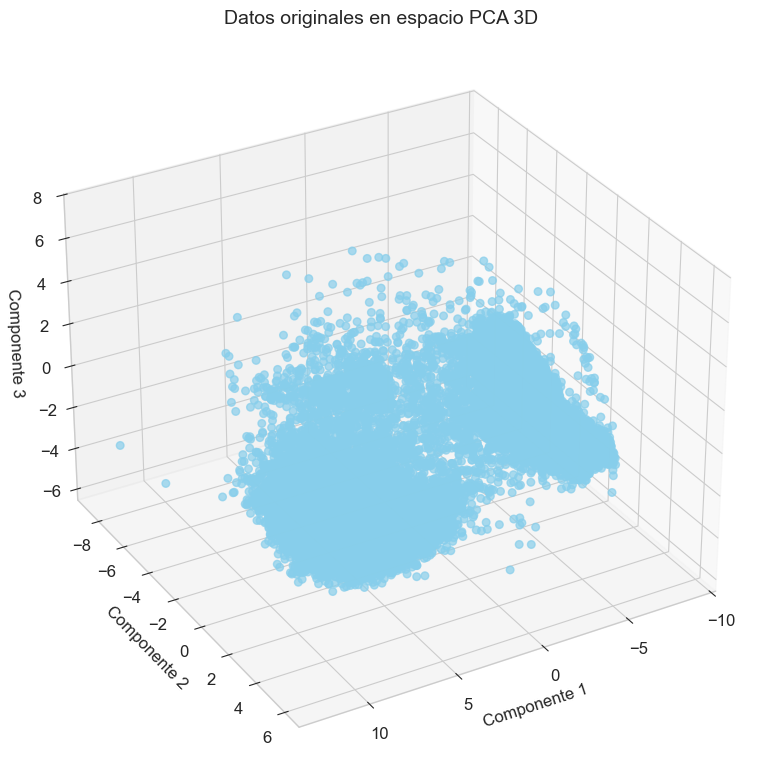

Evaluando modelos para k en [2, 3, 4, 5, 6, 7, 8, 9, 10]...
Entrenando modelo con k=2...
k=2: Silueta=0.3825, Inercia=1823526.39, Tiempo=2.38s
Entrenando modelo con k=3...
k=3: Silueta=0.3314, Inercia=1552016.60, Tiempo=2.69s
Entrenando modelo con k=4...
k=4: Silueta=0.3391, Inercia=1293470.81, Tiempo=3.78s
Entrenando modelo con k=5...
k=5: Silueta=0.3383, Inercia=1178042.88, Tiempo=4.38s
Entrenando modelo con k=6...
k=6: Silueta=0.3177, Inercia=1139782.96, Tiempo=5.58s
Entrenando modelo con k=7...
k=7: Silueta=0.3265, Inercia=1107330.02, Tiempo=6.75s
Entrenando modelo con k=8...
k=8: Silueta=0.3031, Inercia=1069408.84, Tiempo=8.34s
Entrenando modelo con k=9...
k=9: Silueta=0.2987, Inercia=1037680.77, Tiempo=9.36s
Entrenando modelo con k=10...
k=10: Silueta=0.1724, Inercia=1009886.04, Tiempo=11.73s


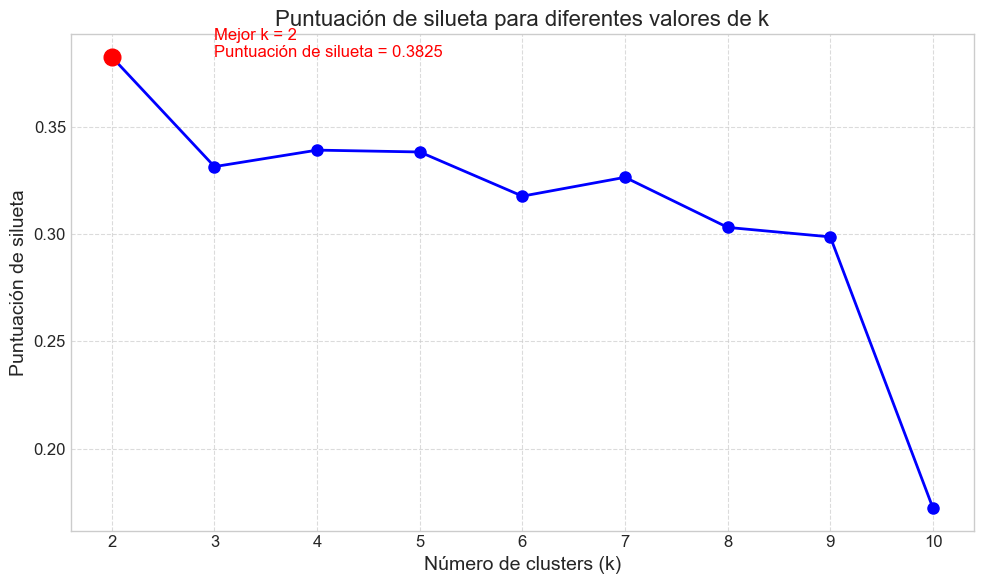

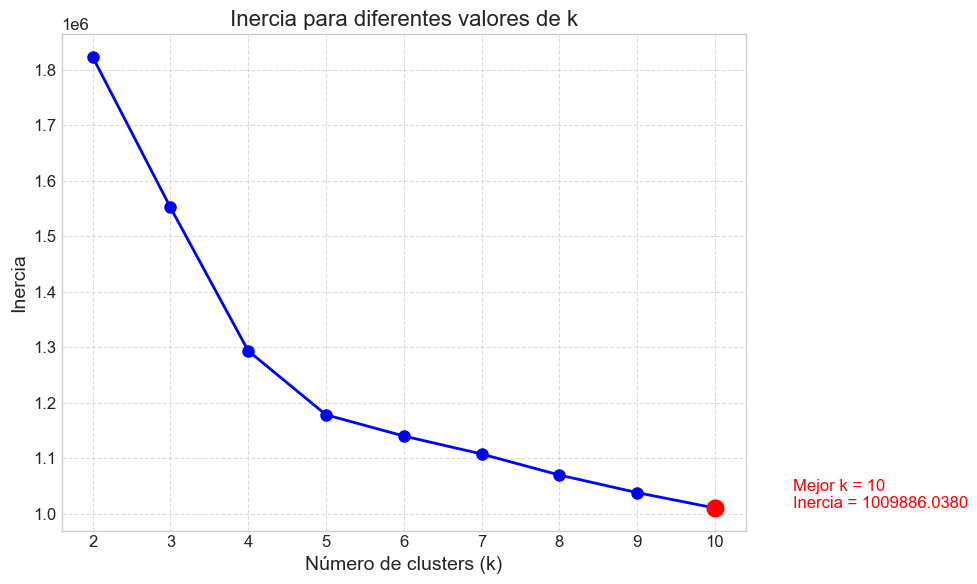


Mejor valor de k según análisis de silueta: 2
Mejor valor de k según método del codo: 10

Generando análisis detallado de silueta para k=2...
Calculando coeficientes de silueta para k=2...


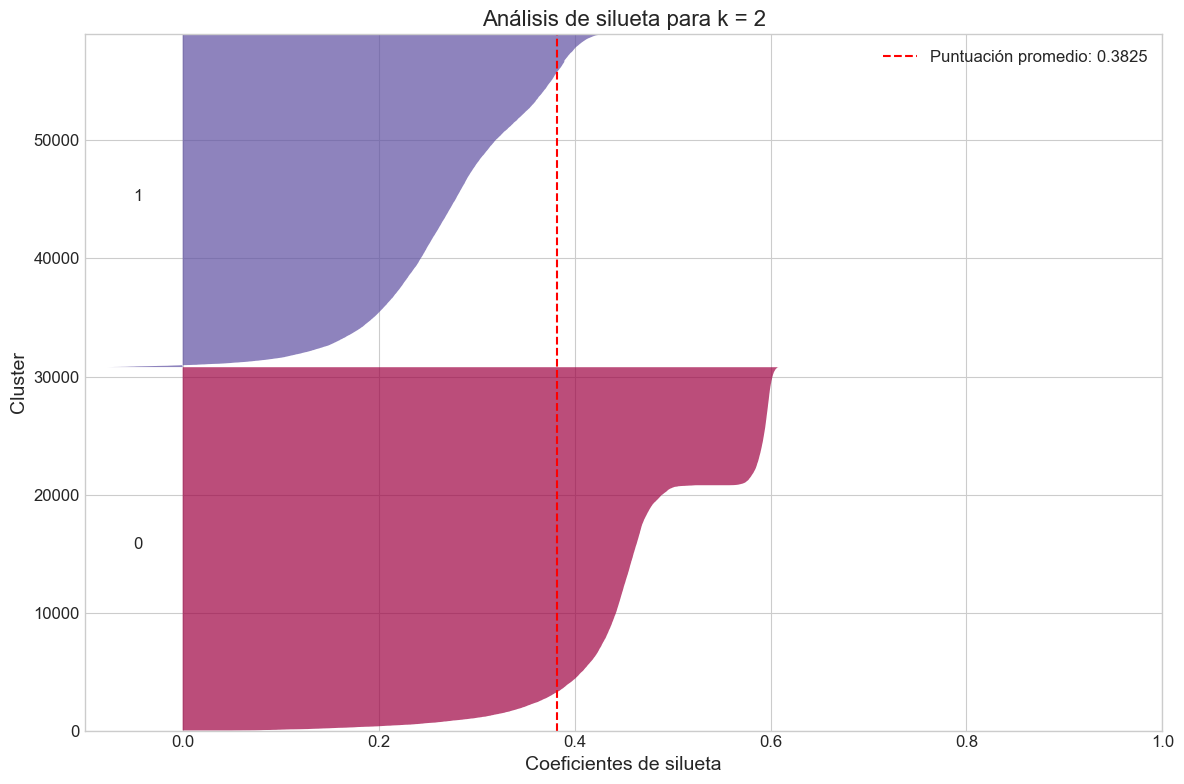


Visualización del mejor clustering en 2D:


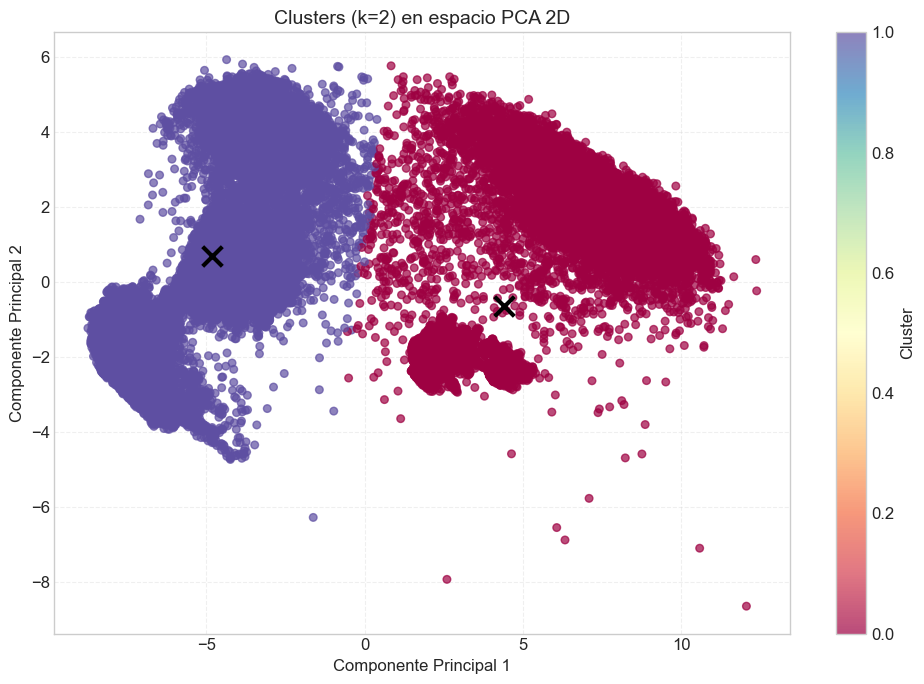


Visualización del mejor clustering en 3D:


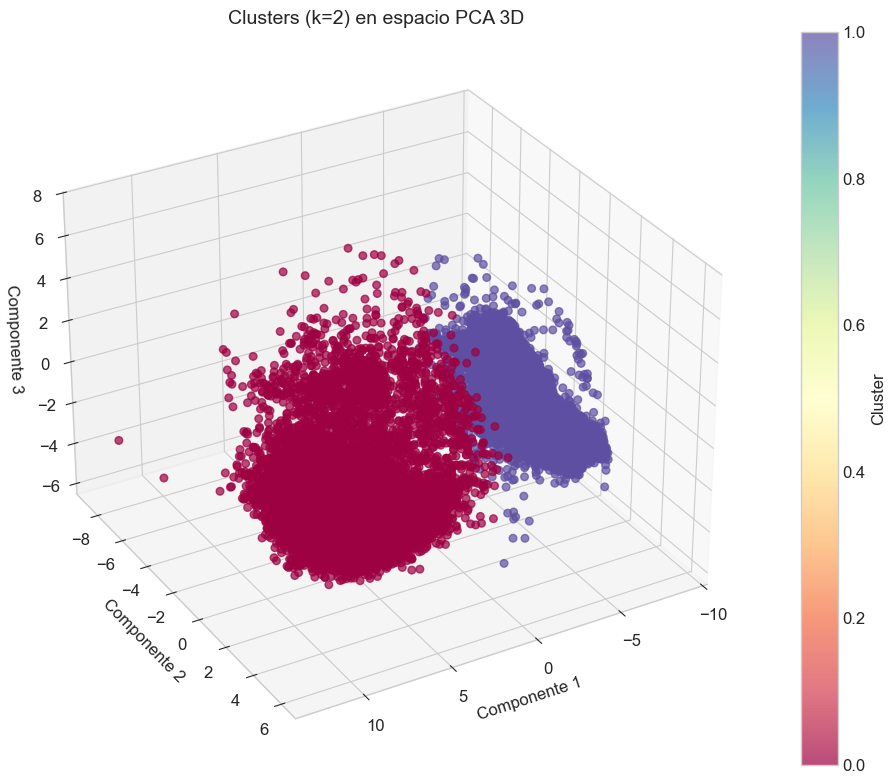


Vista desde diferentes ángulos:


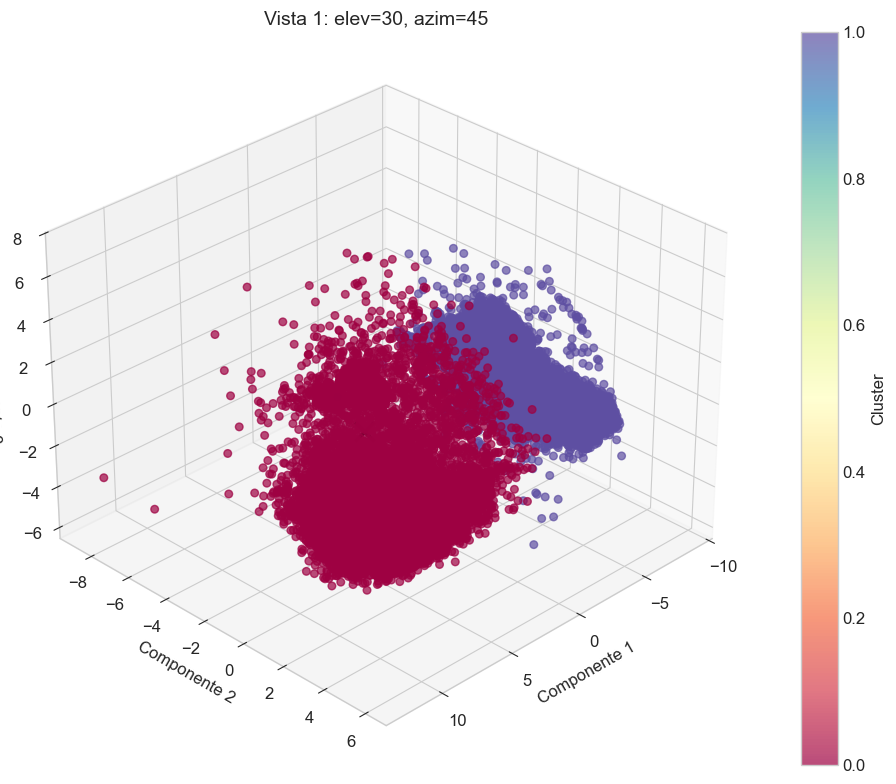

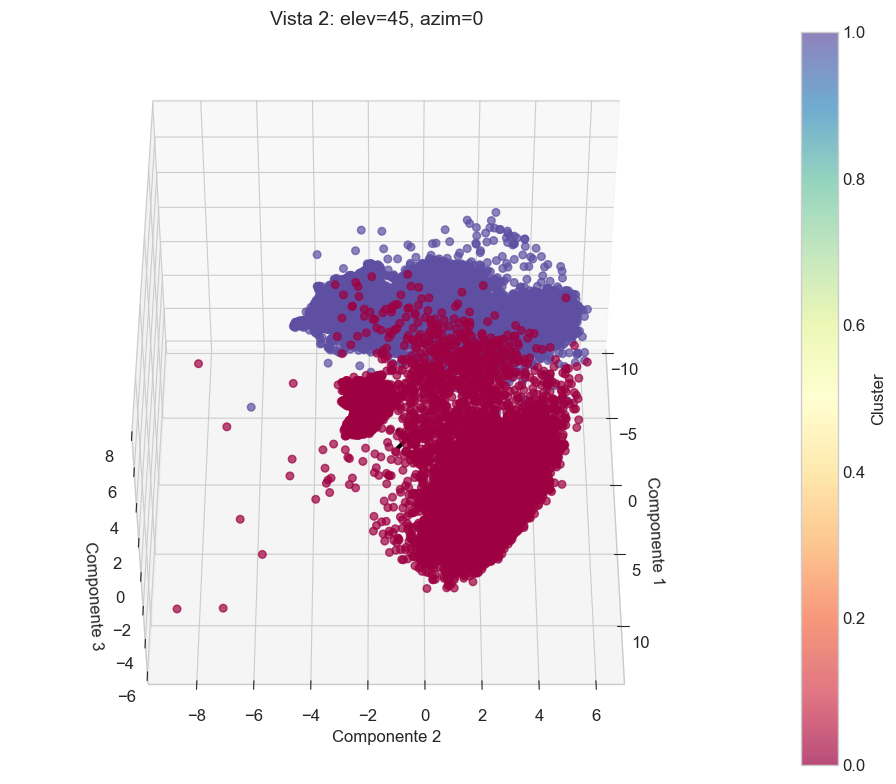

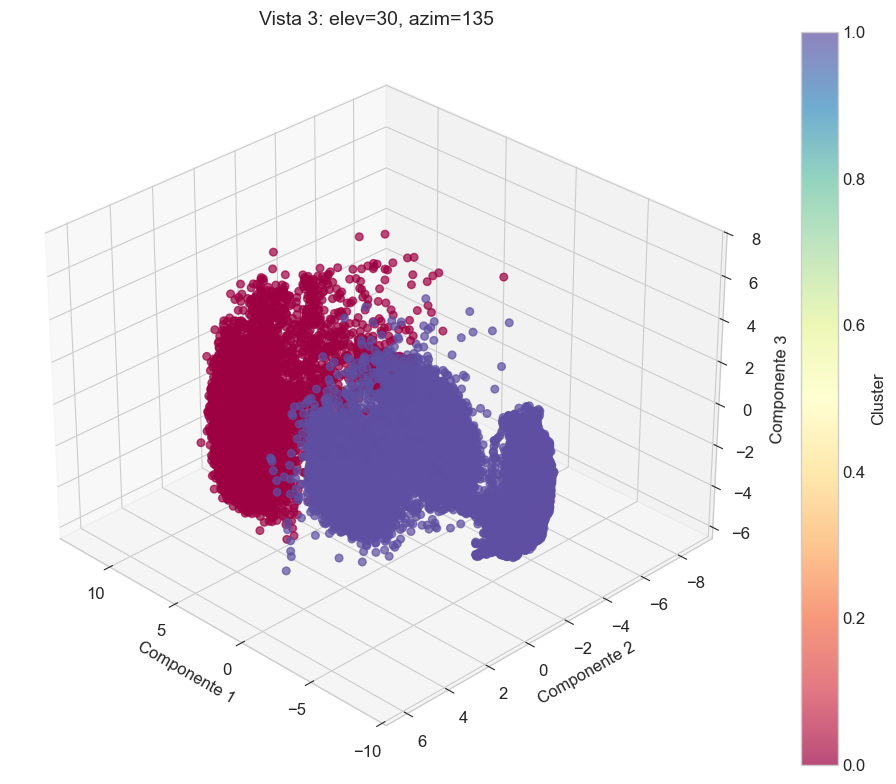


Distribución de clusters:
  Cluster 0: 30779 muestras (52.21%)
  Cluster 1: 28175 muestras (47.79%)


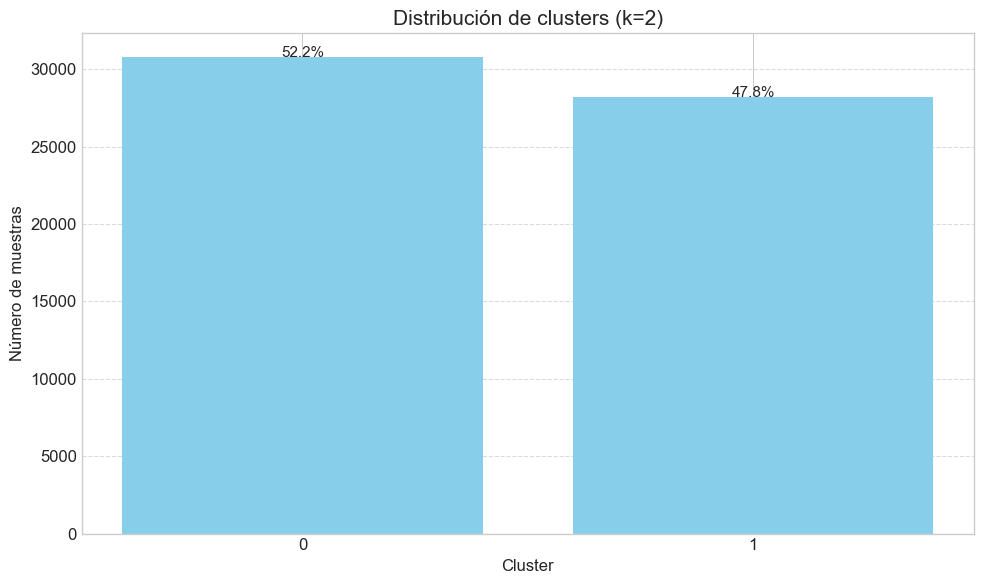

In [42]:
# Análisis de Clustering con K-means - Paso a Paso
# Este script realiza un análisis completo de clustering usando K-means en el dataset de radiografías

## Bloque 1: Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import time
import warnings

# Suprimir advertencias innecesarias
warnings.filterwarnings('ignore')

# Configuración para visualizaciones más atractivas
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Librerías importadas correctamente.")

## Bloque 2: Cargar y preprocesar datos
def load_and_preprocess_data(file_name='Radiografias.csv'):
    """Carga y preprocesa los datos del archivo CSV."""
    print(f"Cargando datos desde {file_name}...")
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file_name)
        print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
        
        # Ver las primeras filas
        print("\nPrimeras 5 filas del dataset:")
        print(df.head())
        
        # Separar características y etiquetas
        labels = df.iloc[:, -1]
        features = df.iloc[:, :-1]
        
        # Normalizar características
        print("\nNormalizando datos...")
        scaler = MinMaxScaler()
        normalized_features = scaler.fit_transform(features)
        
        return normalized_features, labels
        
    except FileNotFoundError:
        print(f"Error: El archivo '{file_name}' no fue encontrado.")
        return None, None
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None, None

# Cargar los datos
X, y = load_and_preprocess_data('Radiografias.csv')

# Verificar las dimensiones
if X is not None:
    print(f"\nDimensiones de los datos: {X.shape}")

## Bloque 3: Explorar las etiquetas
if X is not None and y is not None:
    unique_labels, counts = np.unique(y, return_counts=True)
    print("\nDistribución de etiquetas originales:")
    for label, count in zip(unique_labels, counts):
        print(f"  Etiqueta {label}: {count} ({count/len(y)*100:.2f}%)")
        
    # Visualizar distribución
    plt.figure(figsize=(10, 6))
    plt.bar(unique_labels, counts, color='skyblue')
    plt.title('Distribución de etiquetas en el dataset', fontsize=15)
    plt.xlabel('Etiqueta', fontsize=12)
    plt.ylabel('Número de muestras', fontsize=12)
    plt.xticks(unique_labels)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Bloque 4: Reducción de dimensionalidad con PCA
def perform_pca_analysis(X, n_components=3):
    """Realiza análisis de componentes principales."""
    print(f"Realizando PCA para reducir dimensionalidad a {n_components} componentes...")
    
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    
    explained_variance = pca.explained_variance_ratio_
    print(f"Varianza explicada: {explained_variance.sum():.2%}")
    print(f"Contribución por componente:")
    for i, var in enumerate(explained_variance):
        print(f"  PC{i+1}: {var:.2%}")
    
    # Visualizar varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, color='skyblue')
    plt.step(range(1, n_components+1), np.cumsum(explained_variance), where='mid', color='red', label='Acumulada')
    plt.xlabel('Componente Principal')
    plt.ylabel('Proporción de Varianza Explicada')
    plt.title('Varianza Explicada por Componente Principal')
    plt.xticks(range(1, n_components+1))
    plt.ylim([0, 1.05])
    plt.grid(linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return X_reduced, pca

# Realizar PCA con 3 componentes
if X is not None:
    X_reduced, pca = perform_pca_analysis(X, n_components=3)

## Bloque 5: Funciones para visualización 2D y 3D
def plot_clusters_2d(X_2d, labels=None, centroids=None, title=None, alpha=0.7):
    """Visualiza clusters en 2D con etiquetas y centroides opcionales."""
    plt.figure(figsize=(10, 7))
    
    # Si no hay etiquetas, usar un solo color
    if labels is None:
        plt.scatter(X_2d[:, 0], X_2d[:, 1], s=30, color='skyblue', alpha=alpha)
    else:
        scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=30, 
                           cmap="Spectral", alpha=alpha)
        plt.colorbar(scatter, label="Cluster")
    
    # Añadir centroides si están disponibles
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, 
                   linewidths=3, color='black', zorder=10)
    
    plt.xlabel("Componente Principal 1", fontsize=12)
    plt.ylabel("Componente Principal 2", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    if title:
        plt.title(title, fontsize=14)
    
    plt.tight_layout()
    plt.show()

def plot_clusters_3d(X_3d, labels=None, centroids=None, elev=30, azim=60, title=None):
    """Visualiza clusters en 3D con etiquetas y centroides opcionales."""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Si no hay etiquetas, usar un solo color
    if labels is None:
        ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=30, color='skyblue', alpha=0.7)
    else:
        scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                          c=labels, s=30, cmap="Spectral", alpha=0.7)
        plt.colorbar(scatter, label="Cluster")
    
    # Añadir centroides si están disponibles
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
                 marker='x', s=200, linewidths=3, color='black', zorder=10)
    
    ax.set_xlabel("Componente 1", fontsize=12)
    ax.set_ylabel("Componente 2", fontsize=12)
    ax.set_zlabel("Componente 3", fontsize=12)
    ax.view_init(elev=elev, azim=azim)
    
    if title:
        plt.title(title, fontsize=14)
    
    plt.tight_layout()
    plt.show()

## Bloque 6: Visualización de datos con PCA
# Visualizar datos originales en espacio PCA 2D
if 'X_reduced' in locals():
    print("Visualización de datos originales en espacio PCA 2D:")
    plot_clusters_2d(X_reduced[:, :2], title="Datos originales en espacio PCA 2D")
    
    # Visualizar datos originales en espacio PCA 3D
    print("\nVisualización de datos originales en espacio PCA 3D:")
    plot_clusters_3d(X_reduced, title="Datos originales en espacio PCA 3D")

## Bloque 7: Función para análisis de K-means
def fit_kmeans(k, X, random_state=42, n_init=10):
    """Ajusta un modelo K-means para un valor k específico."""
    print(f"Entrenando modelo con k={k}...")
    t0 = time.time()
    
    # Configurar y entrenar modelo KMeans
    kmeans = KMeans(
        n_clusters=k, 
        random_state=random_state, 
        n_init=n_init,
        algorithm='elkan',  # Algoritmo más rápido en la mayoría de casos
        max_iter=300
    )
    
    # Ajustar el modelo
    kmeans.fit(X)
    t1 = time.time()
    
    # Calcular puntuación de silueta
    silhouette = silhouette_score(X, kmeans.labels_)
    
    # Calcular inercia (suma de distancias cuadradas al centroide)
    inertia = kmeans.inertia_
    
    print(f"k={k}: Silueta={silhouette:.4f}, Inercia={inertia:.2f}, Tiempo={t1-t0:.2f}s")
    
    return kmeans, silhouette, inertia

## Bloque 8: Evaluación de múltiples valores de k
def plot_metrics(k_range, scores, metric_name="Puntuación", method_name="métrica"):
    """Visualiza métricas para diferentes valores de k."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores, "bo-", linewidth=2, markersize=8)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel("Número de clusters (k)", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.title(f"{metric_name} para diferentes valores de k", fontsize=16)
    
    # Identificar el mejor k
    if metric_name == "Puntuación de silueta":
        best_k_idx = np.argmax(scores)
        best_score = max(scores)
    else:  # Inercia
        # Para inercia usamos el método del codo
        best_k_idx = np.argmin(scores)
        best_score = min(scores)
    
    best_k = k_range[best_k_idx]
    
    # Marcar el mejor k
    plt.plot(best_k, scores[best_k_idx], 'ro', markersize=12)
    plt.annotate(f'Mejor k = {best_k}\n{metric_name} = {best_score:.4f}',
                xy=(best_k, scores[best_k_idx]),
                xytext=(best_k + 1, scores[best_k_idx]),
                fontsize=12, color='red')
    
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()
    
    return best_k

# Evaluar múltiples valores de k
def find_optimal_k(X, k_range=range(2, 10)):
    """Encuentra el valor óptimo de k."""
    print(f"Evaluando modelos para k en {list(k_range)}...")
    
    silhouette_scores = []
    inertias = []
    models = {}
    
    # Evaluar cada valor de k
    for k in k_range:
        # Entrenar modelo y obtener métricas
        kmeans_model, silhouette, inertia = fit_kmeans(k, X)
        
        # Guardar resultados
        silhouette_scores.append(silhouette)
        inertias.append(inertia)
        models[k] = kmeans_model
    
    # Encontrar el mejor k según silueta
    best_k_silhouette = plot_metrics(k_range, silhouette_scores, 
                                  "Puntuación de silueta", "silueta")
    
    # Evaluar método del codo (inercia)
    best_k_inertia = plot_metrics(k_range, inertias, "Inercia", "codo")
    
    print(f"\nMejor valor de k según análisis de silueta: {best_k_silhouette}")
    print(f"Mejor valor de k según método del codo: {best_k_inertia}")
    
    # Nos quedamos con el mejor según silueta
    best_k = best_k_silhouette
    best_model = models[best_k]
    
    return best_k, best_model, models

# Definir rango de k a evaluar
k_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

# Encontrar k óptimo
if 'X' in locals():
    best_k, best_model, models = find_optimal_k(X, k_range)

## Bloque 9: Función para análisis de silueta
def plot_silhouette_analysis(X, kmeans, n_clusters):
    """Genera un gráfico detallado del análisis de silueta."""
    print(f"Calculando coeficientes de silueta para k={n_clusters}...")
    
    # Calcular coeficientes de silueta para cada muestra
    silhouette_vals = silhouette_samples(X, kmeans.labels_)
    
    # Crear gráfico
    plt.figure(figsize=(12, 8))
    y_lower = 10
    
    # Generar colores para cada cluster
    colors = plt.cm.get_cmap('Spectral')(np.linspace(0, 1, n_clusters))
    
    for i in range(n_clusters):
        # Agregar muestras de silueta para el cluster i
        cluster_vals = silhouette_vals[kmeans.labels_ == i]
        cluster_vals.sort()
        
        size_cluster = cluster_vals.shape[0]
        y_upper = y_lower + size_cluster
        
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals,
                         facecolor=colors[i], edgecolor='none', alpha=0.7)
        
        # Etiquetar clusters
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10
    
    # Puntuación promedio de silueta
    avg_score = np.mean(silhouette_vals)
    plt.axvline(x=avg_score, color="red", linestyle="--", 
               label=f'Puntuación promedio: {avg_score:.4f}')
    
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    plt.title(f"Análisis de silueta para k = {n_clusters}", fontsize=16)
    plt.xlabel("Coeficientes de silueta", fontsize=14)
    plt.ylabel("Cluster", fontsize=14)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    
    return avg_score

## Bloque 10: Análisis detallado del mejor modelo
# Análisis detallado del mejor modelo
if 'best_model' in locals() and 'X' in locals():
    print(f"\nGenerando análisis detallado de silueta para k={best_k}...")
    plot_silhouette_analysis(X, best_model, best_k)
    
    # Visualizar en 2D con datos PCA
    if 'X_reduced' in locals() and 'pca' in locals():
        # Proyectar centroides
        centroids_reduced = pca.transform(best_model.cluster_centers_)
        
        # Visualización 2D
        print("\nVisualización del mejor clustering en 2D:")
        plot_clusters_2d(X_reduced[:, :2], best_model.labels_, centroids_reduced[:, :2], 
                       title=f"Clusters (k={best_k}) en espacio PCA 2D")

## Bloque 11: Visualización 3D del mejor modelo
# Visualización 3D del mejor modelo
if 'best_model' in locals() and 'X_reduced' in locals() and 'pca' in locals():
    centroids_reduced = pca.transform(best_model.cluster_centers_)
    print("\nVisualización del mejor clustering en 3D:")
    plot_clusters_3d(X_reduced, best_model.labels_, centroids_reduced,
                   title=f"Clusters (k={best_k}) en espacio PCA 3D")
    
    # Ver desde diferentes ángulos
    print("\nVista desde diferentes ángulos:")
    angles = [(30, 45), (45, 0), (30, 135)]
    for i, (elev, azim) in enumerate(angles):
        plot_clusters_3d(X_reduced, best_model.labels_, centroids_reduced,
                       elev=elev, azim=azim,
                       title=f"Vista {i+1}: elev={elev}, azim={azim}")

## Bloque 12: Análisis de la distribución de clusters
# Análisis de la distribución de clusters
if 'best_model' in locals() and 'X' in locals():
    print("\nDistribución de clusters:")
    unique_clusters, counts = np.unique(best_model.labels_, return_counts=True)
    
    for cluster, count in zip(unique_clusters, counts):
        print(f"  Cluster {cluster}: {count} muestras ({count/len(X)*100:.2f}%)")
    
    # Visualizar distribución de clusters
    plt.figure(figsize=(10, 6))
    plt.bar(unique_clusters, counts, color='skyblue')
    plt.title(f'Distribución de clusters (k={best_k})', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Número de muestras', fontsize=12)
    plt.xticks(unique_clusters)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Añadir etiquetas con porcentajes
    for i, count in enumerate(counts):
        plt.text(unique_clusters[i], count + 0.1, f'{count/len(X)*100:.1f}%', 
                ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()

Librerías importantes importadas.

Datos divididos en:
  - Entrenamiento: 41267 muestras
  - Prueba: 17687 muestras

Aplicando K-Means con 20 clusters al conjunto de entrenamiento...
Modelo K-Means entrenado en el conjunto de entrenamiento.
Muestras representativas identificadas en el conjunto de entrenamiento.
Etiquetas simuladas para las muestras representativas del conjunto de entrenamiento obtenidas.


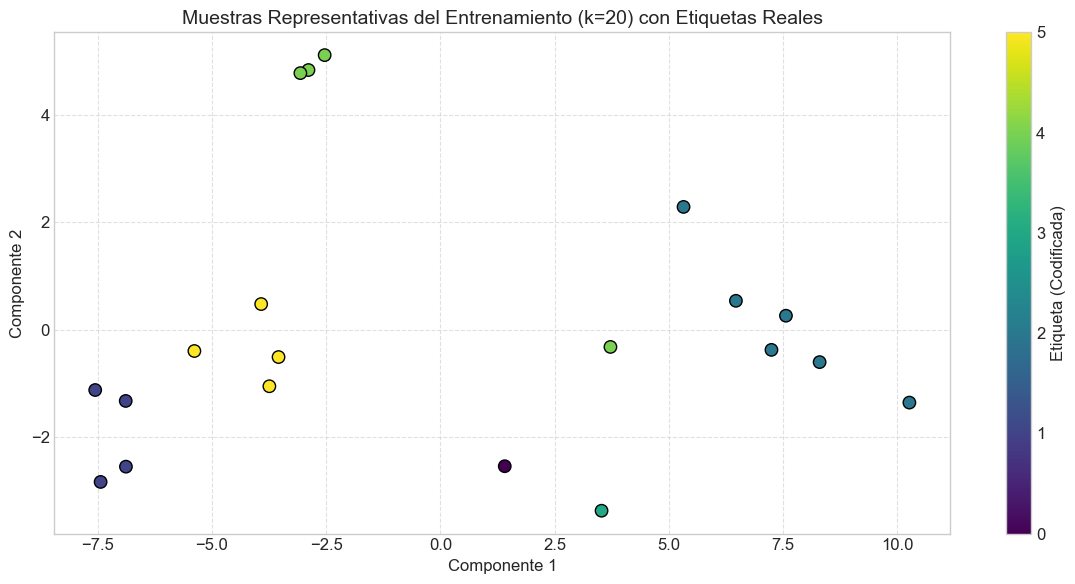

Pseudo-etiquetas propagadas al conjunto de entrenamiento.
Pseudo-etiquetas asignadas al conjunto de prueba.

'Precisión' de las pseudo-etiquetas en el conjunto de prueba (comparación con etiquetas reales): 0.9714


In [78]:
## Bloque 13: Importaciones necesarias y configuración para el aprendizaje semi-supervisado simulado
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Configuración para visualizaciones más atractivas (si aún no se ha ejecutado)
if 'plt_style_set' not in locals():
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 12
    plt_style_set = True

print("Librerías importantes importadas.")

## Bloque 14: Separación de datos en conjuntos de entrenamiento y prueba
# Definir el tamaño del conjunto de prueba
test_size = 0.3  # 30% para prueba, 70% para entrenamiento
random_state_split = 42  # Para reproducibilidad

if 'X' in locals() and 'y' in locals():
    # Asegurarse de que X e y sean DataFrames o Series de Pandas para manipular índices
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Separar los datos en entrenamiento y prueba
    X_train_df, X_test_df, y_train_series, y_test_series = train_test_split(X, y, test_size=test_size, random_state=random_state_split, stratify=y)

    # Restablecer los índices para asegurar que sean numéricos secuenciales
    X_train = X_train_df.reset_index(drop=True).values
    X_test = X_test_df.reset_index(drop=True).values
    y_train = y_train_series.reset_index(drop=True).values
    y_test = y_test_series.reset_index(drop=True).values

    print(f"\nDatos divididos en:")
    print(f"  - Entrenamiento: {X_train.shape[0]} muestras")
    print(f"  - Prueba: {X_test.shape[0]} muestras")
else:
    print("Error: Los datos (X) o las etiquetas (y) no están disponibles para realizar la separación.")

## Bloque 15: Aplicación de K-Means al conjunto de entrenamiento
# Definir el número de clusters para K-Means
n_clusters_semi = 20
print(f"\nAplicando K-Means con {n_clusters_semi} clusters al conjunto de entrenamiento...")

if 'X_train' in locals():
    # Entrenar el modelo K-Means solo en el conjunto de entrenamiento
    kmeans_semi = KMeans(n_clusters=n_clusters_semi, random_state=42, n_init=10, algorithm='elkan', max_iter=300)
    kmeans_semi.fit(X_train)
    print("Modelo K-Means entrenado en el conjunto de entrenamiento.")

    # Encontrar las muestras más representativas de cada cluster (los centroides) en el conjunto de entrenamiento
    X_clusters_dist_train = kmeans_semi.transform(X_train)
    representative_idxs_train = np.argmin(X_clusters_dist_train, axis=0)
    X_representative_samples_train = X_train[representative_idxs_train]
    print("Muestras representativas identificadas en el conjunto de entrenamiento.")
else:
    print("Error: El conjunto de entrenamiento (X_train) no está disponible.")

## Bloque 16: Simulación del etiquetado de muestras representativas
if 'y_train' in locals() and 'representative_idxs_train' in locals():
    # Simular el etiquetado manual de estas muestras representativas usando las etiquetas del conjunto de entrenamiento
    y_representative_samples_train = y_train[representative_idxs_train]
    print("Etiquetas simuladas para las muestras representativas del conjunto de entrenamiento obtenidas.")
else:
    print("Error: Las etiquetas del conjunto de entrenamiento (y_train) o los índices de las muestras representativas no están disponibles.")

## Bloque 17: Visualización de las muestras representativas del entrenamiento
if 'X_representative_samples_train' in locals() and 'y_representative_samples_train' in locals():
    if X_representative_samples_train.shape[1] > 1:
        # Reducir la dimensionalidad a 2 para la visualización si es necesario
        if X_representative_samples_train.shape[1] > 2:
            pca_vis_train = PCA(n_components=2, random_state=42)
            X_representative_reduced_train = pca_vis_train.fit_transform(X_representative_samples_train)
        else:
            X_representative_reduced_train = X_representative_samples_train

        # Convertir etiquetas a valores numéricos para el mapa de colores
        label_encoder_train_rep = LabelEncoder()
        y_representative_encoded_train = label_encoder_train_rep.fit_transform(y_representative_samples_train)

        plt.figure(figsize=(12, 6))
        scatter_train = plt.scatter(X_representative_reduced_train[:, 0], X_representative_reduced_train[:, 1], c=y_representative_encoded_train, cmap='viridis', s=80, edgecolors='k')
        plt.title(f'Muestras Representativas del Entrenamiento (k={n_clusters_semi}) con Etiquetas Reales', fontsize=14)
        plt.xlabel('Componente 1', fontsize=12)
        plt.ylabel('Componente 2', fontsize=12)
        plt.colorbar(scatter_train, label='Etiqueta (Codificada)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Las muestras representativas del entrenamiento tienen una sola característica, no se pueden visualizar en 2D.")
else:
    print("Error: Las muestras representativas o sus etiquetas no están disponibles para la visualización.")

## Bloque 18: Propagación de pseudo-etiquetas al conjunto de entrenamiento
if 'X_train' in locals() and 'kmeans_semi' in locals() and 'y_representative_samples_train' in locals():
    y_pseudo_labels_train = np.empty(len(X_train), dtype=object)
    for i in range(n_clusters_semi):
        cluster_i_indices_train = np.where(kmeans_semi.labels_ == i)[0]
        y_pseudo_labels_train[cluster_i_indices_train] = y_representative_samples_train[i]
    print("Pseudo-etiquetas propagadas al conjunto de entrenamiento.")
else:
    print("Error: No se dispone de los datos necesarios para propagar las pseudo-etiquetas al conjunto de entrenamiento.")

## Bloque 19: Asignación de pseudo-etiquetas al conjunto de prueba
if 'X_test' in locals() and 'kmeans_semi' in locals() and 'y_representative_samples_train' in locals():
    # Predecir los clusters para el conjunto de prueba usando el modelo K-Means entrenado en el conjunto de entrenamiento
    test_cluster_labels = kmeans_semi.predict(X_test)

    # Asignar pseudo-etiquetas al conjunto de prueba basadas en las etiquetas de las muestras representativas del entrenamiento
    y_pseudo_labels_test = np.empty(len(X_test), dtype=object)
    for i in range(n_clusters_semi):
        # La etiqueta asignada al cluster i es la etiqueta de la muestra representativa del entrenamiento en ese cluster
        representative_label = y_representative_samples_train[i]
        # Asignar esta etiqueta a todas las muestras del conjunto de prueba que pertenecen al cluster i
        y_pseudo_labels_test[test_cluster_labels == i] = representative_label

    print("Pseudo-etiquetas asignadas al conjunto de prueba.")
else:
    print("Error: No se dispone de los datos necesarios para asignar pseudo-etiquetas al conjunto de prueba.")

## Bloque 20: Evaluación de la "precisión" de las pseudo-etiquetas en el conjunto de prueba
if 'y_test' in locals() and 'y_pseudo_labels_test' in locals():
    if len(y_test) == len(y_pseudo_labels_test):
        accuracy_pseudo_labels_test = np.mean(y_test == y_pseudo_labels_test)
        print(f"\n'Precisión' de las pseudo-etiquetas en el conjunto de prueba (comparación con etiquetas reales): {accuracy_pseudo_labels_test:.4f}")
    else:
        print("Error: La longitud de las etiquetas reales del conjunto de prueba no coincide con las pseudo-etiquetas del conjunto de prueba.")
else:
    print("Error: Las etiquetas reales del conjunto de prueba o las pseudo-etiquetas del conjunto de prueba no están disponibles para la evaluación.")

Tiempo de entrenamiento inicial: 66.54 s
Probabilidades más bajas (mayor incertidumbre):
[0.70615663 0.73321234 0.76037709 0.7885244  0.80259069 0.83434118
 0.84999833 0.85162572 0.85716446 0.86983768]


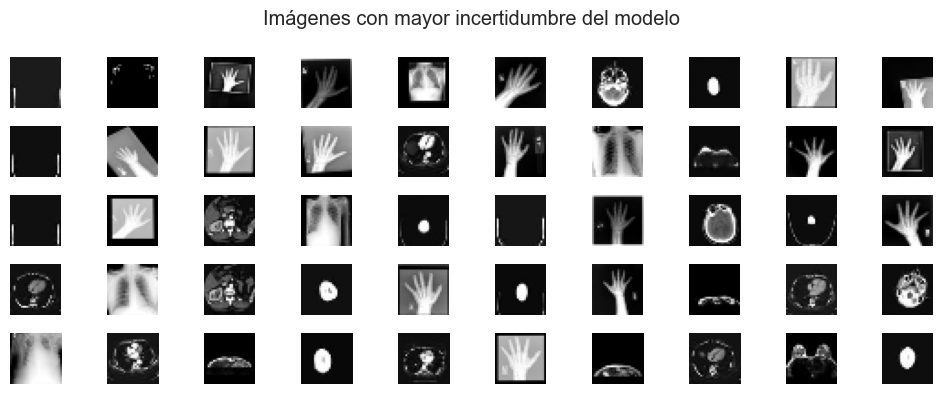

In [79]:
# ---------------------------------------------------------
# BLOQUE 21 - Entrenamiento inicial del modelo
# ---------------------------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train[:1000], y_train[:1000])  # Entrenamiento con 1000 muestras iniciales
print("Tiempo de entrenamiento inicial:", round(time.time() - start, 2), "s")

# ---------------------------------------------------------
# BLOQUE 22 - Cálculo de incertidumbre en predicciones
# ---------------------------------------------------------
y_probs = model.predict_proba(X_train[:1000])
uncertainty = 1 - np.max(y_probs, axis=1)  # Mayor incertidumbre = menor probabilidad máxima
print("Probabilidades más bajas (mayor incertidumbre):")
print(np.sort(np.max(y_probs, axis=1))[:10])  # Muestra las 10 más inciertas

# ---------------------------------------------------------
# BLOQUE 23 - Selección de imágenes con mayor incertidumbre
# ---------------------------------------------------------
k = 50  # Número de imágenes a revisar manualmente
sorted_ixs = np.argsort(np.max(y_probs, axis=1))  # Índices de mayor incertidumbre (menor confianza)

X_lowest = X_train[:1000][sorted_ixs[:k]]  # <- corregido: sin .values
y_lowest = y_train[:1000][sorted_ixs[:k]]  # <- corregido: sin .values

# ---------------------------------------------------------
# BLOQUE 24 - Visualización de los ejemplos más inciertos
# ---------------------------------------------------------
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(5, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.suptitle("Imágenes con mayor incertidumbre del modelo")
plt.tight_layout()
plt.show()


In [80]:
# ---------------------------------------------------------
# BLOQUE 25 - Evaluación del modelo (Precisión)
# ---------------------------------------------------------
from sklearn.metrics import accuracy_score

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Cálculo de la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.9832
